In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001023860"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001023860
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,STEWARDSHIP FINANCIAL CORP
Ticker,SSFN


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,27.0,8.055556e+00,6.539309e-01,6.98,7.535,7.93,8.53,9.45
interest income,45.0,7.711244e+06,1.067567e+06,5308000.00,6643000.000,8018000.00,8539000.00,9401000.00
net income,45.0,1.004467e+06,5.521491e+05,-1065000.00,774000.000,1014000.00,1252000.00,2301000.00
net interest income,12.0,6.603083e+06,4.978118e+05,5897000.00,6103000.000,6823000.00,6990000.00,7202000.00
provision for loan losses,33.0,5.280303e+05,1.141898e+06,-780000.00,-300000.000,65000.00,1200000.00,4705000.00


# Plots

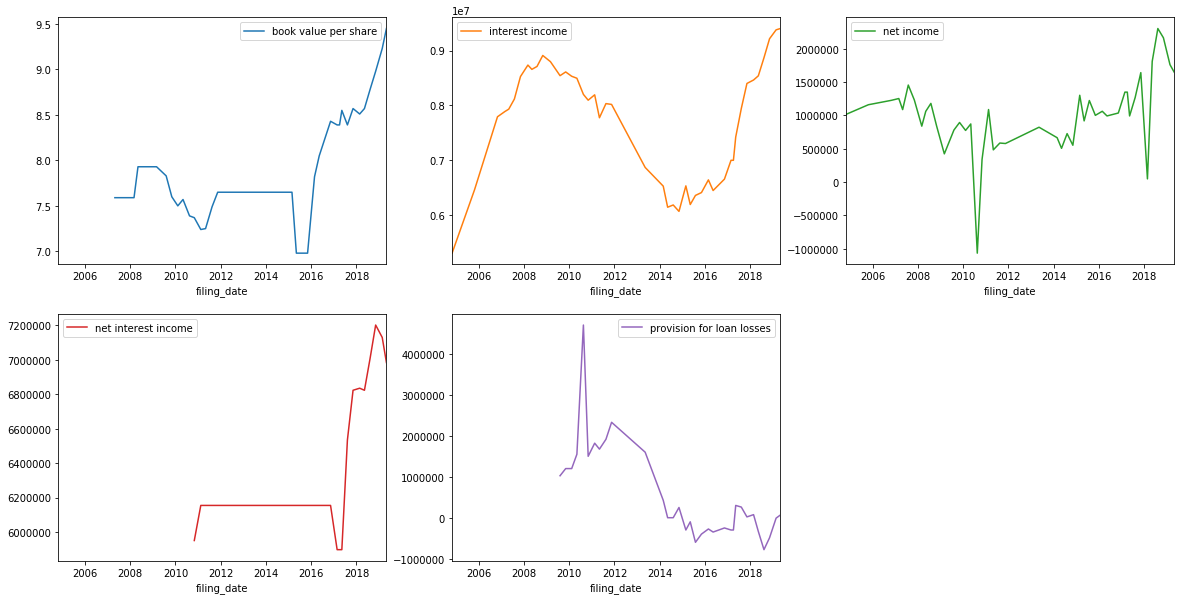

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001023860 book value per share       2004Q3 to 2006Q4: 10 periods  missing   
           book value per share        2007Q2 to 2007Q4: 3 periods  missing   
           book value per share        2008Q2 to 2009Q1: 4 periods  missing   
           book value per share       2011Q4 to 2014Q4: 13 periods  missing   
           book value per share        2015Q2 to 2015Q3: 2 periods  missing   
           book value per share                             2016Q2  missing   
           interest income             2004Q4 to 2005Q2: 3 periods  missing   
           interest income             2005Q4 to 2006Q2: 3 periods  missing   
           interest income                                  2009Q1  missing   
           interest income             2011Q4 to 2012Q4: 5 periods  missing   
           interest income             2013Q2 to 2013Q3: 2 periods  missing   
           interest income                                  2016Q2  missing   
           net income                  2004Q4 to 2005Q2: 3 periods  missing   
           net income                  2005Q4 to 2006Q2: 3 periods  missing   
           net income                                       2009Q1  missing   
           net income                  2011Q4 to 2012Q4: 5 periods  missing   
           net income                  2013Q2 to 2013Q3: 2 periods  missing   
           net income                                       2016Q2  missing   
           net interest income        2004Q3 to 2010Q2: 24 periods  missing   
           net interest income        2011Q1 to 2016Q3: 23 periods  missing   
           net interest income                              2017Q1  missing   
           provision for loan losses  2004Q3 to 2009Q1: 19 periods  missing   
           provision for loan losses   2011Q4 to 2012Q4: 5 periods  missing   
           provision for loan losses   2013Q2 to 2013Q3: 2 periods  missing   
           provision for loan losses                        2016Q2  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001023860 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()